#Стратегия и тактика обучения модели

In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,sex,bdate,has_photo,has_mobile,followers_count,graduation,education_form,relation,education_status,langs,life_main,people_main,city,last_seen,occupation_type,occupation_name,career_start,career_end,result
0,64100,2,23.4.1990,1,1.0,150.0,2012.0,Full-time,2.0,Student (Specialist),Русский;English,0,0,Kaliningrad,2020-08-19 20:47:43,university,"БФУ им. Канта (бывш. РГУ им. Канта, КГУ)",False,False,0
1,46851,2,11.4,0,1.0,92.0,2011.0,Distance Learning,4.0,Alumnus (Specialist),Русский,0,0,NaN,2020-12-25 10:31:53,university,ЛНУ (бывш. ЛНПУ) им. Тараса Шевченко,False,False,0
2,13159,2,5.10,0,1.0,62.0,2012.0,Full-time,0.0,Alumnus (Specialist),Русский,0,6,Mogilev,2020-03-06 03:37:47,university,"БРУ (бывш. МГТУ, ММИ)",False,False,0
3,59148,1,1.3.1967,0,1.0,179.0,1989.0,Full-time,4.0,PhD,Русский,False,False,Moscow,2020-10-10 18:06:27,university,Bodø Graduate School of Business,False,False,0
4,46429,2,NaN,0,1.0,74.0,2008.0,Full-time,7.0,Alumnus (Specialist),Русский,3,2,Ryazan,2020-01-03 03:34:09,university,"РГРТУ (бывш. РГРТА, РРТИ)",False,False,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8193 entries, 0 to 8192
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8193 non-null   int64  
 1   sex               8193 non-null   int64  
 2   bdate             7025 non-null   object 
 3   has_photo         8193 non-null   int64  
 4   has_mobile        8193 non-null   float64
 5   followers_count   8193 non-null   float64
 6   graduation        8193 non-null   float64
 7   education_form    7585 non-null   object 
 8   relation          8193 non-null   float64
 9   education_status  8193 non-null   object 
 10  langs             8193 non-null   object 
 11  life_main         8193 non-null   object 
 12  people_main       8193 non-null   object 
 13  city              7611 non-null   object 
 14  last_seen         8193 non-null   object 
 15  occupation_type   8000 non-null   object 
 16  occupation_name   8000 non-null   object 


In [4]:
df.describe()

,id,sex,has_photo,has_mobile,followers_count,graduation,relation,result
count,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000
mean,50844.286342,1.570487,0.496155,0.988893,511.926767,1726.038936,1.974857,0.539119
std,29009.305868,0.495037,0.500016,0.104809,3315.669725,703.592633,2.133108,0.498498
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25537.000000,1.000000,0.000000,1.000000,93.000000,2004.000000,0.000000,0.000000
50%,51494.000000,2.000000,0.000000,1.000000,203.000000,2010.000000,1.000000,1.000000
75%,75963.000000,2.000000,1.000000,1.000000,419.000000,2013.000000,4.000000,1.000000
max,99998.000000,2.000000,1.000000,1.000000,202243.000000,7676.000000,8.000000,1.000000


In [5]:
df['sex'].value_counts()

sex
2    4674
1    3519
Name: count, dtype: int64

<Axes: xlabel='sex'>

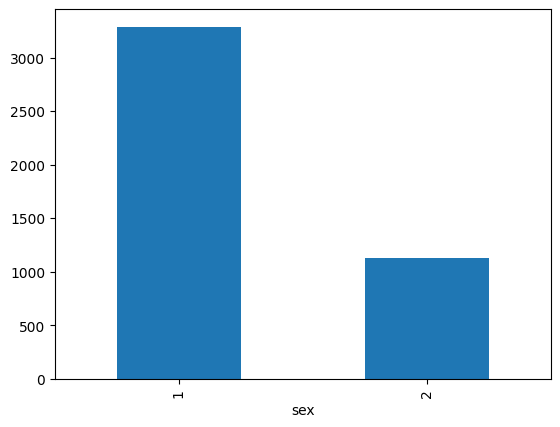

In [9]:
df[df['result'] == 1]['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='sex'>

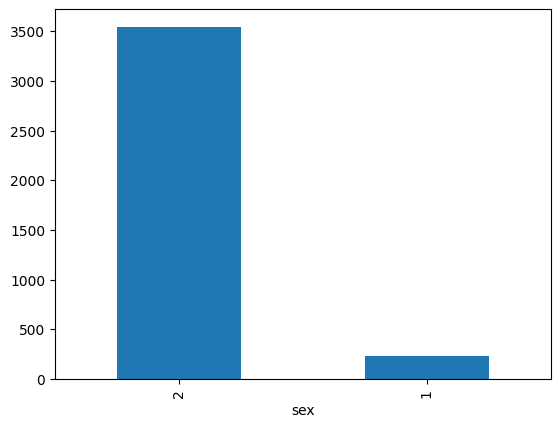

In [10]:
df[df['result'] == 0]['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='has_photo'>

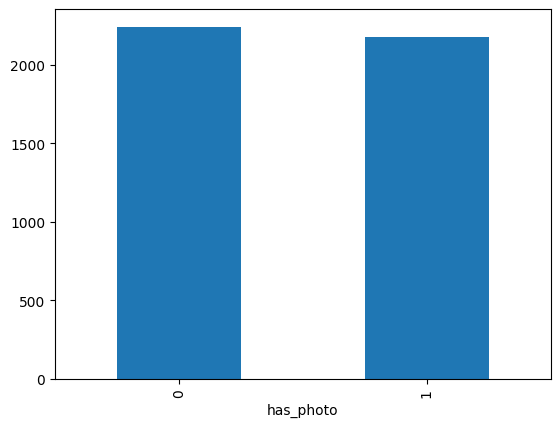

In [11]:
df[df['result'] == 1]['has_photo'].value_counts().plot(kind='bar')

<Axes: xlabel='has_photo'>

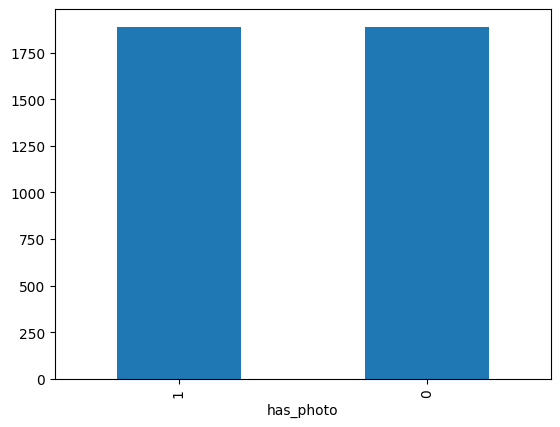

In [12]:
df[df['result'] == 0]['has_photo'].value_counts().plot(kind='bar')

<Axes: xlabel='has_mobile'>

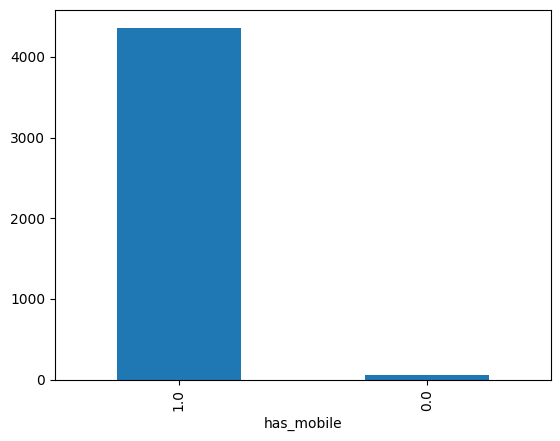

In [13]:
df[df['result'] == 1]['has_mobile'].value_counts().plot(kind='bar')

<Axes: xlabel='has_mobile'>

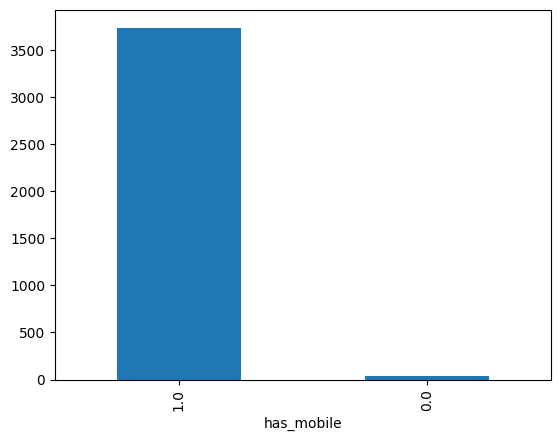

In [14]:
df[df['result'] == 0]['has_mobile'].value_counts().plot(kind='bar')

<Axes: >

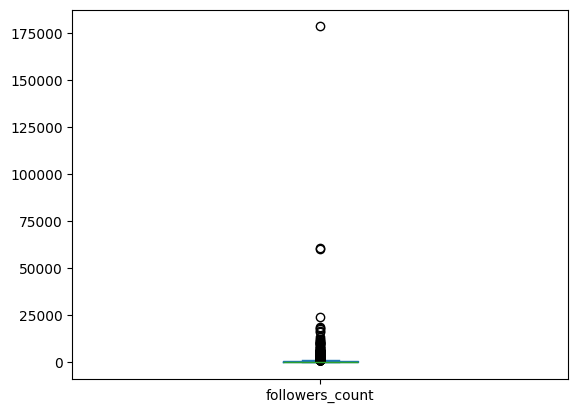

In [20]:
df[df['result'] == 1]['followers_count'].plot(kind='box')

<Axes: >

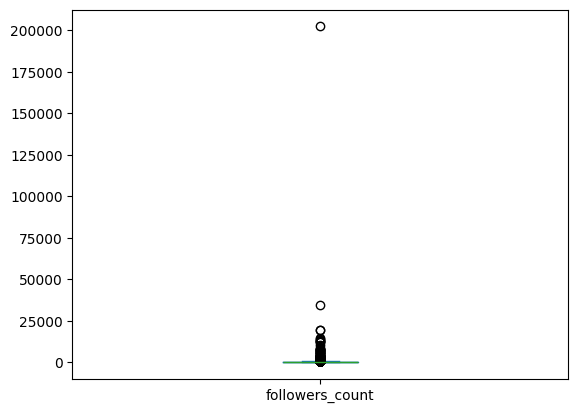

In [21]:
df[df['result'] == 0]['followers_count'].plot(kind='box')

<Axes: ylabel='Frequency'>

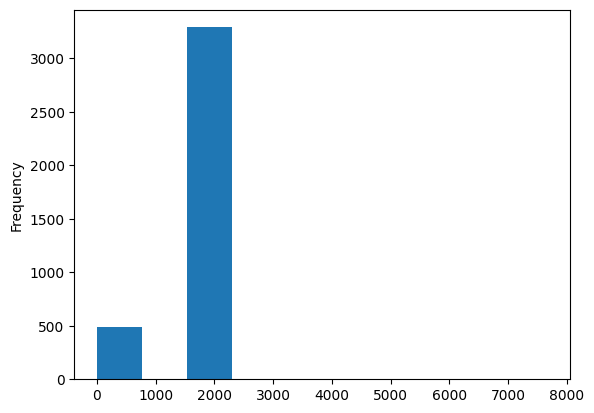

In [23]:
df[df['result'] == 0]['graduation'].plot(kind='hist')

<Axes: ylabel='Frequency'>

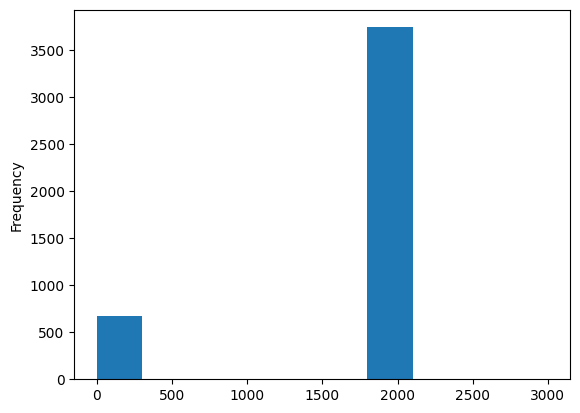

In [24]:
df[df['result'] == 1]['graduation'].plot(kind='hist')

<Axes: xlabel='education_form'>

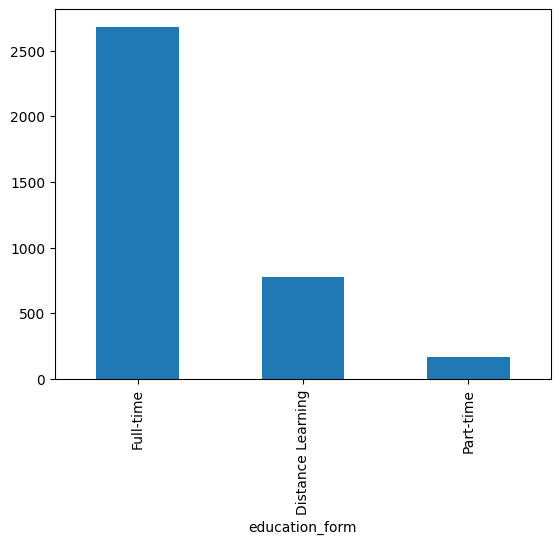

In [25]:
df[df['result'] == 0]['education_form'].value_counts().plot(kind='bar')

<Axes: xlabel='education_form'>

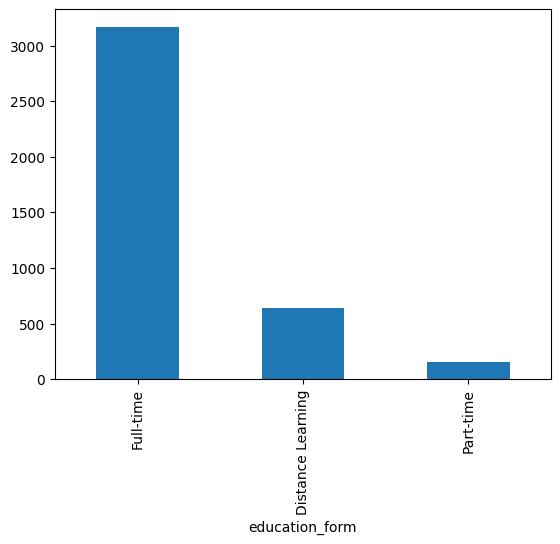

In [26]:
df[df['result'] == 1]['education_form'].value_counts().plot(kind='bar')

<Axes: xlabel='relation'>

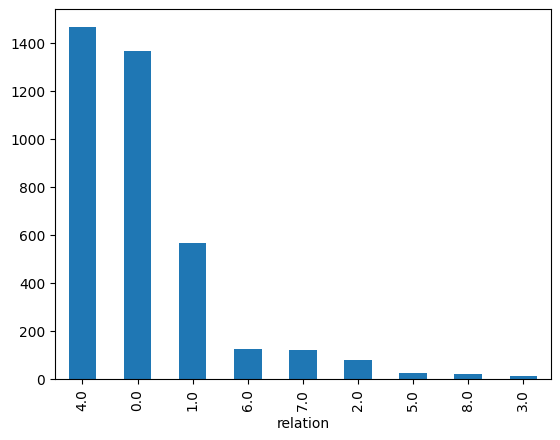

In [27]:
df[df['result'] == 0]['relation'].value_counts().plot(kind='bar')

relation — семейное положение (1 — не женат/не замужем; 
2 — есть друг/есть подруга; 3 — помолвлен/помолвлена; 
4 — женат/замужем; 5 — всё сложно;
6 — в активном поиске; 7 — влюблён/влюблена; 
8 — в гражданском браке; 0 — не указано).

<Axes: xlabel='relation'>

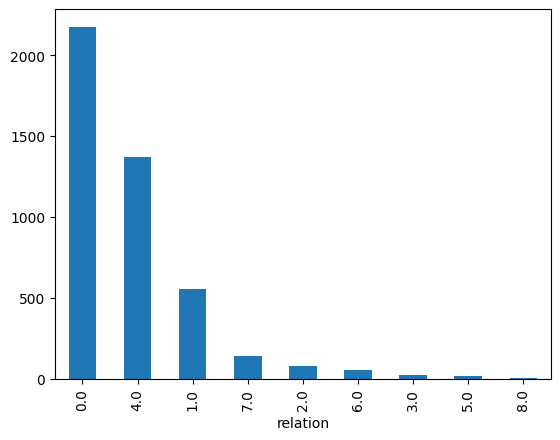

In [29]:
df[df['result'] == 1]['relation'].value_counts().plot(kind='bar')

<Axes: xlabel='city'>

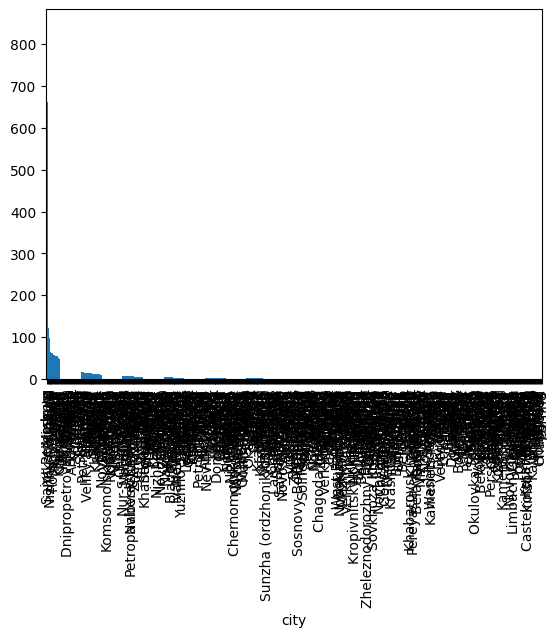

In [33]:
df[df['result'] == 1]['city'].value_counts().plot(kind='bar')

<Axes: xlabel='education_status'>

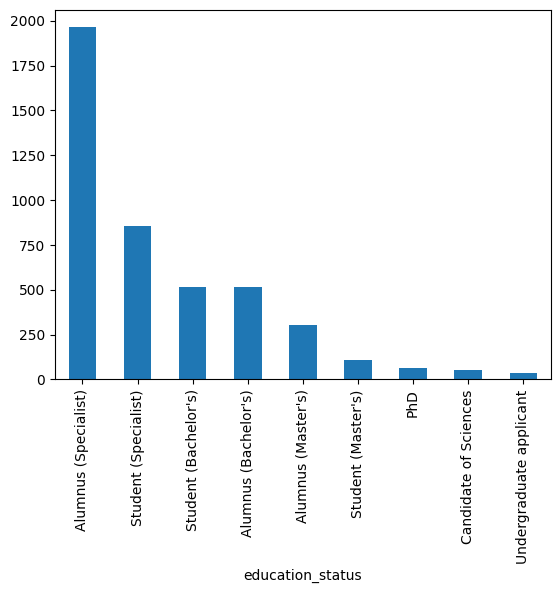

In [34]:
df[df['result'] == 1]['education_status'].value_counts().plot(kind='bar')

<Axes: xlabel='education_status'>

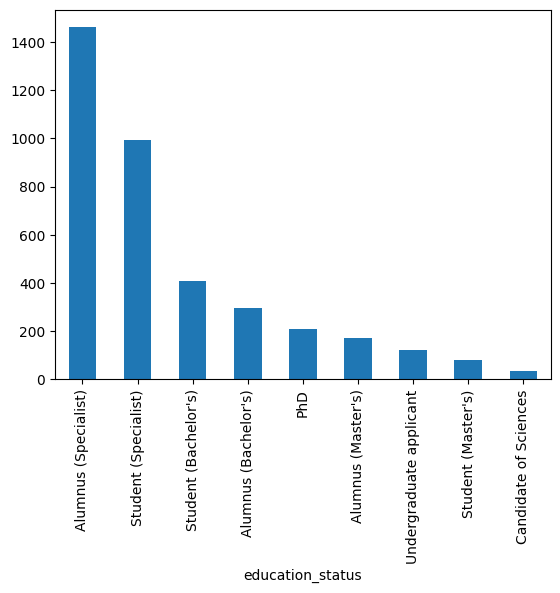

In [35]:
df[df['result'] == 0]['education_status'].value_counts().plot(kind='bar')

<Axes: xlabel='occupation_type'>

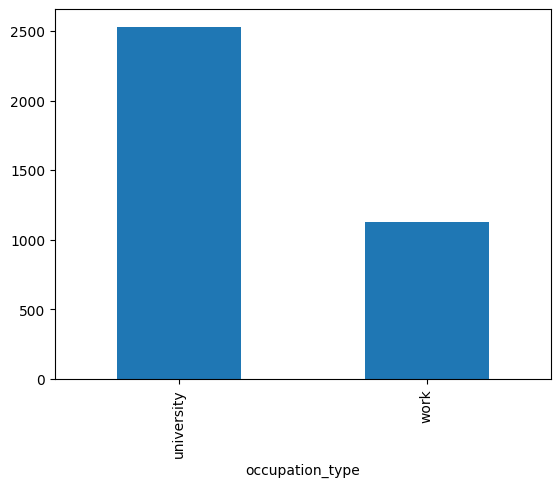

In [37]:
df[df['result'] == 0]['occupation_type'].value_counts().plot(kind='bar')

<Axes: xlabel='occupation_type'>

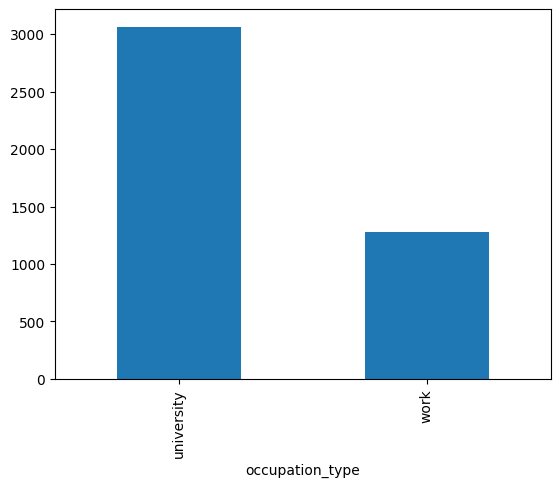

In [38]:
df[df['result'] == 1]['occupation_type'].value_counts().plot(kind='bar')

<Axes: xlabel='career_end'>

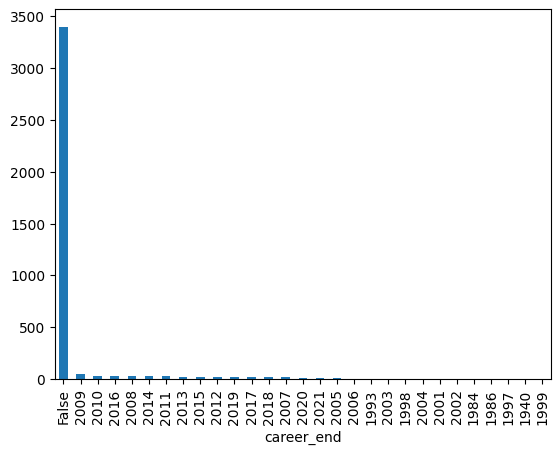

In [45]:
df[df['result'] == 0]['career_end'].value_counts().plot(kind='bar')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8193 entries, 0 to 8192
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8193 non-null   int64  
 1   sex               8193 non-null   int64  
 2   bdate             7025 non-null   object 
 3   has_photo         8193 non-null   int64  
 4   has_mobile        8193 non-null   float64
 5   followers_count   8193 non-null   float64
 6   graduation        8193 non-null   float64
 7   education_form    7585 non-null   object 
 8   relation          8193 non-null   float64
 9   education_status  8193 non-null   object 
 10  langs             8193 non-null   object 
 11  life_main         8193 non-null   object 
 12  people_main       8193 non-null   object 
 13  city              7611 non-null   object 
 14  last_seen         8193 non-null   object 
 15  occupation_type   8000 non-null   object 
 16  occupation_name   8000 non-null   object 


In [49]:
df

,id,sex,bdate,has_photo,has_mobile,followers_count,graduation,education_form,relation,education_status,langs,life_main,people_main,city,last_seen,occupation_type,occupation_name,career_start,career_end,result
0,64100,2,23.4.1990,1,1.0,150.0,2012.0,Full-time,2.0,Student (Specialist),Русский;English,0,0,Kaliningrad,2020-08-19 20:47:43,university,"БФУ им. Канта (бывш. РГУ им. Канта, КГУ)",False,False,0
1,46851,2,11.4,0,1.0,92.0,2011.0,Distance Learning,4.0,Alumnus (Specialist),Русский,0,0,NaN,2020-12-25 10:31:53,university,ЛНУ (бывш. ЛНПУ) им. Тараса Шевченко,False,False,0
2,13159,2,5.10,0,1.0,62.0,2012.0,Full-time,0.0,Alumnus (Specialist),Русский,0,6,Mogilev,2020-03-06 03:37:47,university,"БРУ (бывш. МГТУ, ММИ)",False,False,0
3,59148,1,1.3.1967,0,1.0,179.0,1989.0,Full-time,4.0,PhD,Русский,False,False,Moscow,2020-10-10 18:06:27,university,Bodø Graduate School of Business,False,False,0
4,46429,2,NaN,0,1.0,74.0,2008.0,Full-time,7.0,Alumnus (Specialist),Русский,3,2,Ryazan,2020-01-03 03:34:09,university,"РГРТУ (бывш. РГРТА, РРТИ)",False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8188,70625,1,17.11.1987,0,1.0,75.0,2013.0,Part-time,0.0,Student (Bachelor's),Русский,6,2,Moscow,2020-08-25 08:58:42,university,МСПИ (МОСПИ),False,False,0
8189,29009,2,NaN,0,1.0,726.0,0.0,Full-time,0.0,Alumnus (Bachelor's),Русский,0,0,Saint Petersburg,2020-03-28 02:25:55,university,СПбГТИ (ТУ),False,False,0
8190,62607,1,NaN,1,1.0,448.0,2008.0,Full-time,0.0,Alumnus (Bachelor's),Русский,0,6,Karaganda,2020-01-28 11:01:26,work,ТОО Eurasian Machinery,2010,False,1
8191,48342,2,NaN,1,1.0,2063.0,2025.0,Distance Learning,1.0,Alumnus (Specialist),Русский;English,6,6,Moscow,2020-07-01 16:40:54,work,Ремонт компьютеров и ноутбуков,2010,False,0


In [50]:
df['education_form'].value_counts()

education_form
Full-time            5847
Distance Learning    1418
Part-time             320
Name: count, dtype: int64

In [51]:
df['education_status'].value_counts()

education_status
Alumnus (Specialist)       3424
Student (Specialist)       1851
Student (Bachelor's)        924
Alumnus (Bachelor's)        807
Alumnus (Master's)          476
PhD                         273
Student (Master's)          187
Undergraduate applicant     161
Candidate of Sciences        90
Name: count, dtype: int64

In [52]:
df['langs'].value_counts()

langs
Русский                                       4435
False                                         1913
Русский;English                                611
Русский;Українська;English                      89
Русский;Українська                              83
                                              ... 
Српски                                           1
Русский;Türkçe;English                           1
Українська;English;Polski;Русский                1
Русский;Ненэця' вада;Шӧльӄумыт әты;English       1
Русский;Беларуская;English;Français              1
Name: count, Length: 397, dtype: int64

In [53]:
df['city'].value_counts()

city
Moscow              1371
Saint Petersburg    1010
Kyiv                 219
Yekaterinburg        162
Minsk                111
                    ... 
Revda                  1
Vorotynets             1
Zdolbunov              1
Remmash                1
Parfino                1
Name: count, Length: 860, dtype: int64

In [58]:
df.drop(columns='city', axis=1, inplace=True)

In [64]:
df['bdate'].fillna('0', inplace=True)

In [65]:
df

,id,sex,bdate,has_photo,has_mobile,followers_count,graduation,education_form,relation,education_status,langs,life_main,people_main,last_seen,occupation_type,occupation_name,career_start,career_end,result
0,64100,2,23.4.1990,1,1.0,150.0,2012.0,Full-time,2.0,Student (Specialist),Русский;English,0,0,2020-08-19 20:47:43,university,"БФУ им. Канта (бывш. РГУ им. Канта, КГУ)",False,False,0
1,46851,2,11.4,0,1.0,92.0,2011.0,Distance Learning,4.0,Alumnus (Specialist),Русский,0,0,2020-12-25 10:31:53,university,ЛНУ (бывш. ЛНПУ) им. Тараса Шевченко,False,False,0
2,13159,2,5.10,0,1.0,62.0,2012.0,Full-time,0.0,Alumnus (Specialist),Русский,0,6,2020-03-06 03:37:47,university,"БРУ (бывш. МГТУ, ММИ)",False,False,0
3,59148,1,1.3.1967,0,1.0,179.0,1989.0,Full-time,4.0,PhD,Русский,False,False,2020-10-10 18:06:27,university,Bodø Graduate School of Business,False,False,0
4,46429,2,0,0,1.0,74.0,2008.0,Full-time,7.0,Alumnus (Specialist),Русский,3,2,2020-01-03 03:34:09,university,"РГРТУ (бывш. РГРТА, РРТИ)",False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8188,70625,1,17.11.1987,0,1.0,75.0,2013.0,Part-time,0.0,Student (Bachelor's),Русский,6,2,2020-08-25 08:58:42,university,МСПИ (МОСПИ),False,False,0
8189,29009,2,0,0,1.0,726.0,0.0,Full-time,0.0,Alumnus (Bachelor's),Русский,0,0,2020-03-28 02:25:55,university,СПбГТИ (ТУ),False,False,0
8190,62607,1,0,1,1.0,448.0,2008.0,Full-time,0.0,Alumnus (Bachelor's),Русский,0,6,2020-01-28 11:01:26,work,ТОО Eurasian Machinery,2010,False,1
8191,48342,2,0,1,1.0,2063.0,2025.0,Distance Learning,1.0,Alumnus (Specialist),Русский;English,6,6,2020-07-01 16:40:54,work,Ремонт компьютеров и ноутбуков,2010,False,0


In [73]:
df.drop(columns='langs', axis=1, inplace=False)

,id,sex,bdate,has_photo,has_mobile,followers_count,graduation,education_form,relation,education_status,life_main,people_main,last_seen,occupation_type,occupation_name,career_start,career_end,result
0,64100,2,23.4.1990,1,1.0,150.0,2012.0,Full-time,2.0,Student (Specialist),0,0,2020-08-19 20:47:43,university,"БФУ им. Канта (бывш. РГУ им. Канта, КГУ)",False,False,0
1,46851,2,11.4.1990,0,1.0,92.0,2011.0,Distance Learning,4.0,Alumnus (Specialist),0,0,2020-12-25 10:31:53,university,ЛНУ (бывш. ЛНПУ) им. Тараса Шевченко,False,False,0
2,13159,2,5.10.1990,0,1.0,62.0,2012.0,Full-time,0.0,Alumnus (Specialist),0,6,2020-03-06 03:37:47,university,"БРУ (бывш. МГТУ, ММИ)",False,False,0
3,59148,1,1.3.1967,0,1.0,179.0,1989.0,Full-time,4.0,PhD,False,False,2020-10-10 18:06:27,university,Bodø Graduate School of Business,False,False,0
4,46429,2,0,0,1.0,74.0,2008.0,Full-time,7.0,Alumnus (Specialist),3,2,2020-01-03 03:34:09,university,"РГРТУ (бывш. РГРТА, РРТИ)",False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8188,70625,1,17.11.1987,0,1.0,75.0,2013.0,Part-time,0.0,Student (Bachelor's),6,2,2020-08-25 08:58:42,university,МСПИ (МОСПИ),False,False,0
8189,29009,2,0,0,1.0,726.0,0.0,Full-time,0.0,Alumnus (Bachelor's),0,0,2020-03-28 02:25:55,university,СПбГТИ (ТУ),False,False,0
8190,62607,1,0,1,1.0,448.0,2008.0,Full-time,0.0,Alumnus (Bachelor's),0,6,2020-01-28 11:01:26,work,ТОО Eurasian Machinery,2010,False,1
8191,48342,2,0,1,1.0,2063.0,2025.0,Distance Learning,1.0,Alumnus (Specialist),6,6,2020-07-01 16:40:54,work,Ремонт компьютеров и ноутбуков,2010,False,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8193 entries, 0 to 8192
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8193 non-null   int64  
 1   sex               8193 non-null   int64  
 2   bdate             6436 non-null   object 
 3   has_photo         8193 non-null   int64  
 4   has_mobile        8193 non-null   float64
 5   followers_count   8193 non-null   float64
 6   graduation        8193 non-null   float64
 7   education_form    7585 non-null   object 
 8   relation          8193 non-null   float64
 9   education_status  8193 non-null   object 
 10  langs             8193 non-null   object 
 11  life_main         8193 non-null   object 
 12  people_main       8193 non-null   object 
 13  last_seen         8193 non-null   object 
 14  occupation_type   8000 non-null   object 
 15  occupation_name   8000 non-null   object 
 16  career_start      8193 non-null   object 


In [82]:
df.drop(columns=['education_form', 'langs'], axis=1, inplace=True)

In [104]:
df

,id,sex,has_photo,has_mobile,followers_count,graduation,relation,education_status,life_main,people_main,last_seen,occupation_type,occupation_name,career_start,career_end,result
0,64100,2,1,1.0,150.0,2012.0,2.0,Student (Specialist),0,0,2020-08-19 20:47:43,university,"БФУ им. Канта (бывш. РГУ им. Канта, КГУ)",False,False,0
1,46851,2,0,1.0,92.0,2011.0,4.0,Alumnus (Specialist),0,0,2020-12-25 10:31:53,university,ЛНУ (бывш. ЛНПУ) им. Тараса Шевченко,False,False,0
2,13159,2,0,1.0,62.0,2012.0,0.0,Alumnus (Specialist),0,6,2020-03-06 03:37:47,university,"БРУ (бывш. МГТУ, ММИ)",False,False,0
3,59148,1,0,1.0,179.0,1989.0,4.0,PhD,False,0,2020-10-10 18:06:27,university,Bodø Graduate School of Business,False,False,0
4,46429,2,0,1.0,74.0,2008.0,7.0,Alumnus (Specialist),3,2,2020-01-03 03:34:09,university,"РГРТУ (бывш. РГРТА, РРТИ)",False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8188,70625,1,0,1.0,75.0,2013.0,0.0,Student (Bachelor's),6,2,2020-08-25 08:58:42,university,МСПИ (МОСПИ),False,False,0
8189,29009,2,0,1.0,726.0,0.0,0.0,Alumnus (Bachelor's),0,0,2020-03-28 02:25:55,university,СПбГТИ (ТУ),False,False,0
8190,62607,1,1,1.0,448.0,2008.0,0.0,Alumnus (Bachelor's),0,6,2020-01-28 11:01:26,work,ТОО Eurasian Machinery,2010,False,1
8191,48342,2,1,1.0,2063.0,2025.0,1.0,Alumnus (Specialist),6,6,2020-07-01 16:40:54,work,Ремонт компьютеров и ноутбуков,2010,False,0


In [87]:
df['people_main'].value_counts()

people_main
0        2778
False    2333
2        1702
6         632
1         406
5         275
4          34
3          33
Name: count, dtype: int64

In [101]:
def zamena(data):
    if data == 'False':
        return 0
    else:
        return int(data)

In [102]:
df['people_main'] = df['people_main'].apply(zamena)

In [103]:
df['people_main'].value_counts()

people_main
0    5111
2    1702
6     632
1     406
5     275
4      34
3      33
Name: count, dtype: int64

In [105]:
df['education_status'].value_counts()

education_status
Alumnus (Specialist)       3424
Student (Specialist)       1851
Student (Bachelor's)        924
Alumnus (Bachelor's)        807
Alumnus (Master's)          476
PhD                         273
Student (Master's)          187
Undergraduate applicant     161
Candidate of Sciences        90
Name: count, dtype: int64

In [106]:
def change_education_status(data):
    if data == 'Undergraduate applicant':
        return 0
    elif data == "Student (Bachelor's)":
        return 1
    elif data == "Student (Specialist)":
        return 2
    elif data == "Student (Master's)":
        return 3
    elif data == "Alumnus (Bachelor's)":
        return 4
    elif data == "Alumnus (Specialist)":
        return 5
    elif data == "Alumnus (Master's)":
        return 6
    elif data == "PhD" or data == "Candidate of Sciences":
        return 7

In [107]:
df['education_status'] = df['education_status'].apply(change_education_status)

In [108]:
df['education_status'].value_counts()

education_status
5    3424
2    1851
1     924
4     807
6     476
7     363
3     187
0     161
Name: count, dtype: int64

In [109]:
df

,id,sex,has_photo,has_mobile,followers_count,graduation,relation,education_status,life_main,people_main,last_seen,occupation_type,occupation_name,career_start,career_end,result
0,64100,2,1,1.0,150.0,2012.0,2.0,2,0,0,2020-08-19 20:47:43,university,"БФУ им. Канта (бывш. РГУ им. Канта, КГУ)",False,False,0
1,46851,2,0,1.0,92.0,2011.0,4.0,5,0,0,2020-12-25 10:31:53,university,ЛНУ (бывш. ЛНПУ) им. Тараса Шевченко,False,False,0
2,13159,2,0,1.0,62.0,2012.0,0.0,5,0,6,2020-03-06 03:37:47,university,"БРУ (бывш. МГТУ, ММИ)",False,False,0
3,59148,1,0,1.0,179.0,1989.0,4.0,7,False,0,2020-10-10 18:06:27,university,Bodø Graduate School of Business,False,False,0
4,46429,2,0,1.0,74.0,2008.0,7.0,5,3,2,2020-01-03 03:34:09,university,"РГРТУ (бывш. РГРТА, РРТИ)",False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8188,70625,1,0,1.0,75.0,2013.0,0.0,1,6,2,2020-08-25 08:58:42,university,МСПИ (МОСПИ),False,False,0
8189,29009,2,0,1.0,726.0,0.0,0.0,4,0,0,2020-03-28 02:25:55,university,СПбГТИ (ТУ),False,False,0
8190,62607,1,1,1.0,448.0,2008.0,0.0,4,0,6,2020-01-28 11:01:26,work,ТОО Eurasian Machinery,2010,False,1
8191,48342,2,1,1.0,2063.0,2025.0,1.0,5,6,6,2020-07-01 16:40:54,work,Ремонт компьютеров и ноутбуков,2010,False,0


In [111]:
df['life_main'] = df['life_main'].apply(lambda x: 0 if x == 'False' else int(x))

In [112]:
df['life_main'].value_counts()

life_main
0    5306
1    1103
6    1097
5     316
7     118
2      74
3      73
4      67
8      39
Name: count, dtype: int64

In [113]:
df

,id,sex,has_photo,has_mobile,followers_count,graduation,relation,education_status,life_main,people_main,last_seen,occupation_type,occupation_name,career_start,career_end,result
0,64100,2,1,1.0,150.0,2012.0,2.0,2,0,0,2020-08-19 20:47:43,university,"БФУ им. Канта (бывш. РГУ им. Канта, КГУ)",False,False,0
1,46851,2,0,1.0,92.0,2011.0,4.0,5,0,0,2020-12-25 10:31:53,university,ЛНУ (бывш. ЛНПУ) им. Тараса Шевченко,False,False,0
2,13159,2,0,1.0,62.0,2012.0,0.0,5,0,6,2020-03-06 03:37:47,university,"БРУ (бывш. МГТУ, ММИ)",False,False,0
3,59148,1,0,1.0,179.0,1989.0,4.0,7,0,0,2020-10-10 18:06:27,university,Bodø Graduate School of Business,False,False,0
4,46429,2,0,1.0,74.0,2008.0,7.0,5,3,2,2020-01-03 03:34:09,university,"РГРТУ (бывш. РГРТА, РРТИ)",False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8188,70625,1,0,1.0,75.0,2013.0,0.0,1,6,2,2020-08-25 08:58:42,university,МСПИ (МОСПИ),False,False,0
8189,29009,2,0,1.0,726.0,0.0,0.0,4,0,0,2020-03-28 02:25:55,university,СПбГТИ (ТУ),False,False,0
8190,62607,1,1,1.0,448.0,2008.0,0.0,4,0,6,2020-01-28 11:01:26,work,ТОО Eurasian Machinery,2010,False,1
8191,48342,2,1,1.0,2063.0,2025.0,1.0,5,6,6,2020-07-01 16:40:54,work,Ремонт компьютеров и ноутбуков,2010,False,0


In [115]:
df['last_seen'] = df['last_seen'].apply(lambda x: x.split('-')[0])

In [116]:
df['last_seen'].value_counts()

last_seen
2020    8189
2021       4
Name: count, dtype: int64

In [117]:
df

,id,sex,has_photo,has_mobile,followers_count,graduation,relation,education_status,life_main,people_main,last_seen,occupation_type,occupation_name,career_start,career_end,result
0,64100,2,1,1.0,150.0,2012.0,2.0,2,0,0,2020,university,"БФУ им. Канта (бывш. РГУ им. Канта, КГУ)",False,False,0
1,46851,2,0,1.0,92.0,2011.0,4.0,5,0,0,2020,university,ЛНУ (бывш. ЛНПУ) им. Тараса Шевченко,False,False,0
2,13159,2,0,1.0,62.0,2012.0,0.0,5,0,6,2020,university,"БРУ (бывш. МГТУ, ММИ)",False,False,0
3,59148,1,0,1.0,179.0,1989.0,4.0,7,0,0,2020,university,Bodø Graduate School of Business,False,False,0
4,46429,2,0,1.0,74.0,2008.0,7.0,5,3,2,2020,university,"РГРТУ (бывш. РГРТА, РРТИ)",False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8188,70625,1,0,1.0,75.0,2013.0,0.0,1,6,2,2020,university,МСПИ (МОСПИ),False,False,0
8189,29009,2,0,1.0,726.0,0.0,0.0,4,0,0,2020,university,СПбГТИ (ТУ),False,False,0
8190,62607,1,1,1.0,448.0,2008.0,0.0,4,0,6,2020,work,ТОО Eurasian Machinery,2010,False,1
8191,48342,2,1,1.0,2063.0,2025.0,1.0,5,6,6,2020,work,Ремонт компьютеров и ноутбуков,2010,False,0


In [118]:
df['occupation_type'].value_counts()

occupation_type
university    5594
work          2406
Name: count, dtype: int64

In [119]:
df['occupation_type'] = df['occupation_type'].apply(lambda x: 0 if x == 'university' else 1)

In [120]:
df['occupation_type'].value_counts()

occupation_type
0    5594
1    2599
Name: count, dtype: int64

In [121]:
df

,id,sex,has_photo,has_mobile,followers_count,graduation,relation,education_status,life_main,people_main,last_seen,occupation_type,occupation_name,career_start,career_end,result
0,64100,2,1,1.0,150.0,2012.0,2.0,2,0,0,2020,0,"БФУ им. Канта (бывш. РГУ им. Канта, КГУ)",False,False,0
1,46851,2,0,1.0,92.0,2011.0,4.0,5,0,0,2020,0,ЛНУ (бывш. ЛНПУ) им. Тараса Шевченко,False,False,0
2,13159,2,0,1.0,62.0,2012.0,0.0,5,0,6,2020,0,"БРУ (бывш. МГТУ, ММИ)",False,False,0
3,59148,1,0,1.0,179.0,1989.0,4.0,7,0,0,2020,0,Bodø Graduate School of Business,False,False,0
4,46429,2,0,1.0,74.0,2008.0,7.0,5,3,2,2020,0,"РГРТУ (бывш. РГРТА, РРТИ)",False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8188,70625,1,0,1.0,75.0,2013.0,0.0,1,6,2,2020,0,МСПИ (МОСПИ),False,False,0
8189,29009,2,0,1.0,726.0,0.0,0.0,4,0,0,2020,0,СПбГТИ (ТУ),False,False,0
8190,62607,1,1,1.0,448.0,2008.0,0.0,4,0,6,2020,1,ТОО Eurasian Machinery,2010,False,1
8191,48342,2,1,1.0,2063.0,2025.0,1.0,5,6,6,2020,1,Ремонт компьютеров и ноутбуков,2010,False,0


In [122]:
df.drop(columns='occupation_name', axis=1, inplace=True)

In [123]:
df.drop(columns=['career_end', 'career_start'], axis=1, inplace=True)


In [124]:
df

,id,sex,has_photo,has_mobile,followers_count,graduation,relation,education_status,life_main,people_main,last_seen,occupation_type,result
0,64100,2,1,1.0,150.0,2012.0,2.0,2,0,0,2020,0,0
1,46851,2,0,1.0,92.0,2011.0,4.0,5,0,0,2020,0,0
2,13159,2,0,1.0,62.0,2012.0,0.0,5,0,6,2020,0,0
3,59148,1,0,1.0,179.0,1989.0,4.0,7,0,0,2020,0,0
4,46429,2,0,1.0,74.0,2008.0,7.0,5,3,2,2020,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8188,70625,1,0,1.0,75.0,2013.0,0.0,1,6,2,2020,0,0
8189,29009,2,0,1.0,726.0,0.0,0.0,4,0,0,2020,0,0
8190,62607,1,1,1.0,448.0,2008.0,0.0,4,0,6,2020,1,1
8191,48342,2,1,1.0,2063.0,2025.0,1.0,5,6,6,2020,1,0


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8193 entries, 0 to 8192
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8193 non-null   int64  
 1   sex               8193 non-null   int64  
 2   has_photo         8193 non-null   int64  
 3   has_mobile        8193 non-null   float64
 4   followers_count   8193 non-null   float64
 5   graduation        8193 non-null   float64
 6   relation          8193 non-null   float64
 7   education_status  8193 non-null   int64  
 8   life_main         8193 non-null   int64  
 9   people_main       8193 non-null   int64  
 10  last_seen         8193 non-null   object 
 11  occupation_type   8193 non-null   int64  
 12  result            8193 non-null   int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 832.2+ KB


In [126]:
df.drop(columns='last_seen', axis=1, inplace=True)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8193 entries, 0 to 8192
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8193 non-null   int64  
 1   sex               8193 non-null   int64  
 2   has_photo         8193 non-null   int64  
 3   has_mobile        8193 non-null   float64
 4   followers_count   8193 non-null   float64
 5   graduation        8193 non-null   float64
 6   relation          8193 non-null   float64
 7   education_status  8193 non-null   int64  
 8   life_main         8193 non-null   int64  
 9   people_main       8193 non-null   int64  
 10  occupation_type   8193 non-null   int64  
 11  result            8193 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 768.2 KB


In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [129]:
X = df.drop(columns='result', axis=1)
y = df['result']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
scaler = StandardScaler()

In [132]:
X_train = scaler.fit_transform(X_train)

In [133]:
X_test = scaler.transform(X_test)

In [134]:
knn = KNeighborsClassifier(n_neighbors=5)

In [135]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [136]:
y_pred = knn.predict(X_test)

In [137]:
confusion_matrix(y_test, y_pred)

array([[654, 133],
       [192, 660]], dtype=int64)

In [138]:
accuracy_score(y_test, y_pred)

0.8017083587553386